In [6]:
# core Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cv2 computer vision library for loading images
import cv2

# tensorflow for Convolutional Neural Network (CNN) for final solution
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [7]:
import os

In [8]:
# files imported from Kaggle dataset: Rock, Paper, Scissors
# https://www.kaggle.com/drgfreeman/rockpaperscissors/data
print(os.listdir("./"))

['paper', 'RPS1.ipynb', 'rps-cv-images', '.ipynb_checkpoints', 'scissors', 'test', 'rock', 'README_rpc-cv-images.txt', 'RPS2.ipynb']


In [9]:
rock_dir = "./rock"
paper_dir = "./paper"
scissors_dir ="./scissors"

In [10]:
rock_cat = 0
paper_cat = 1
scissors_cat = 2

In [11]:
# initiate
X = [] # will be an array of pixel values
y = [] # will be a list of the class values, 0, 1, 2
names = [] # will parse filename to create an index 
means = [] # average color of all the pixels in a given image

In [12]:
def merge_classes_of_data(path, cat):
    category = cat
    for p in os.listdir(path):
        file_name = p.split('.')[0]
        img_array = cv2.imread(os.path.join(path, p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(100, 100))
        names.append(file_name)
        means.append(new_img_array.mean())
        X.append(new_img_array)
        y.append(category)

In [13]:
merge_classes_of_data(rock_dir, rock_cat)

In [14]:
merge_classes_of_data(paper_dir, paper_cat)

In [15]:
merge_classes_of_data(scissors_dir, scissors_cat)

In [25]:
X

AttributeError: 'list' object has no attribute 'shape'

In [24]:
X[73].shape

(100, 100)

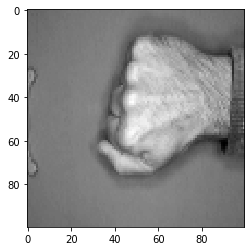

In [16]:
# Plot individual arrays of pixel colors
plt.imshow(X[73], cmap='gray')

In [121]:
means = [int(i) for i in means]

In [123]:
data = {'Names':names, 'Avg Color':means, 'Category':y}

In [124]:
df = pd.DataFrame(data)

In [127]:
df.head()

,Names,Avg Color,Category
0,eJ5fbY23rZWUULxO,106,0
1,TLbqMqwDrww8CS0p,136,0
2,9kYPKMVtd4nOvSK4,107,0
3,N3pHY9fO1y0jdeVu,107,0
4,JXD8WyY4cQoEyvtU,123,0


Category
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Avg Color, dtype: object

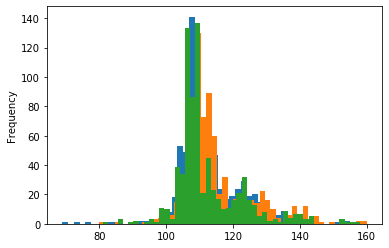

In [139]:
df.groupby(['Category'])['Avg Color'].plot(kind='hist', bins=50)

In [126]:
df['Category'].value_counts()

2    750
0    726
1    712
Name: Category, dtype: int64

In [134]:
print(df.groupby(['Category'])['Avg Color'].mean())
print(df.groupby(['Category'])['Avg Color'].max())
print(df.groupby(['Category'])['Avg Color'].min())

Category
0    113.134986
1    115.393258
2    112.470667
Name: Avg Color, dtype: float64
Category
0    155
1    160
2    158
Name: Avg Color, dtype: int64
Category
0    69
1    80
2    81
Name: Avg Color, dtype: int64


In [ ]:
# Histogram output, min, max and mean all suggest there is not a tremendous amount
# of predictive value associated with the newly created 'Avg Color' feature

(200, 300, 3)
0.0 1.0
(60000, 3)


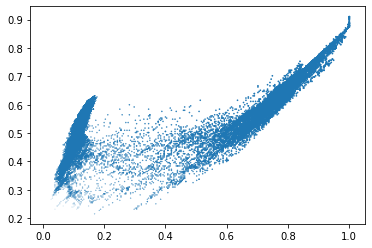

In [28]:
# Reading in data differently to examine scatter or clusters
# (disclaimer: Technique found on Kaggle for doing EDA for image sets)

for p in os.listdir(rock_dir):
    # category = 0 -- will set a separate classifier for each of rock (0), paper (1), scissors (2)
    img_array = plt.imread(os.path.join(rock_dir,p))
    dims = np.shape(img_array)
    print(dims)
    print(np.min(img_array), np.max(img_array))
    pixel_matrix = np.reshape(img_array, (dims[0] * dims[1], dims[2]))
    print(np.shape(pixel_matrix))
    plt.scatter(pixel_matrix[:,0], pixel_matrix[:,1], pixel_matrix[:,2])

    break

In [26]:
img_array

NameError: name 'img_array' is not defined

In [159]:
# I would guess the above separation results from the array values where hands are
# vs. the green screen, so not super helpful

In [17]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [21]:
X_train

[array([[67, 66, 70, ..., 84, 83, 81],
        [80, 76, 82, ..., 83, 84, 82],
        [84, 85, 82, ..., 85, 82, 83],
        ...,
        [81, 83, 86, ..., 85, 86, 84],
        [81, 84, 85, ..., 86, 86, 86],
        [81, 83, 82, ..., 87, 86, 86]], dtype=uint8),
 array([[ 96,  93,  95, ..., 104, 104, 102],
        [ 95,  95,  97, ..., 105, 104, 103],
        [ 96,  97,  97, ..., 106, 105, 104],
        ...,
        [103, 106, 104, ...,  93,  89,  87],
        [102, 105, 103, ...,  98,  93,  91],
        [102, 104, 101, ..., 100,  96,  94]], dtype=uint8),
 array([[63, 65, 69, ..., 54, 52, 51],
        [66, 67, 70, ..., 55, 53, 52],
        [67, 68, 72, ..., 56, 55, 51],
        ...,
        [78, 79, 79, ..., 52, 51, 50],
        [78, 77, 79, ..., 53, 52, 49],
        [77, 76, 78, ..., 54, 53, 49]], dtype=uint8),
 array([[80, 80, 80, ..., 98, 97, 96],
        [80, 80, 83, ..., 96, 95, 94],
        [80, 81, 83, ..., 98, 97, 97],
        ...,
        [81, 83, 84, ..., 15, 15, 16],
        [

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.